- Created 0984310-F_1.csv
- Created 0043121-X_2.csv
- Created 0984311-F_3.csv
- Created 0970100-F_4.csv
- Created 0128800-F_5.csv
- Created 0460542-F_6.csv
- Created 0058991-A_7.csv
- Created 0058990-A_8.csv
- Created 0972100-F_9.csv
- Created 0971810-F_10.csv

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("data/SKU/0043121-X_2.csv")

In [2]:
df

,Sku,Created,Quantity
0,0043121-X,1/4/2024 8:07:23 AM,12
1,0043121-X,1/4/2024 10:29:35 AM,12
2,0043121-X,1/4/2024 2:26:31 PM,24
3,0043121-X,1/4/2024 2:39:40 PM,12
4,0043121-X,1/4/2024 3:11:07 PM,12
...,...,...,...
4166,0043121-X,10/23/2023 1:10:57 PM,12
4167,0043121-X,10/23/2023 1:16:14 PM,12
4168,0043121-X,10/23/2023 1:43:45 PM,12
4169,0043121-X,10/23/2023 1:46:00 PM,12


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from catboost import CatBoostRegressor

def load_and_prepare_data(filepath):
    df = pd.read_csv(filepath)
    df.drop(columns=['Sku'], inplace=True)
    df['Created'] = pd.to_datetime(df['Created'])
    return df

def plot_timeseries(data):
    plt.figure(figsize=(10, 5))
    plt.plot(data['Created'], data['Quantity'], marker='o', linestyle='-')
    plt.title('Time Series Plot of Quantity over Time')
    plt.xlabel('Date')
    plt.ylabel('Quantity')
    plt.grid(True)
    plt.show()

def build_and_evaluate_models(data):
    X = data[['Created']]
    y = data['Quantity']
    X['Created'] = X['Created'].map(pd.Timestamp.toordinal)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    
    models = [
        ('Linear Regression', LinearRegression(), {}),
        ('Ridge', Ridge(), {'alpha': [0.1, 1.0, 10.0]}),
        ('Lasso', Lasso(), {'alpha': [0.1, 1.0, 10.0]}),
        ('Elastic Net', ElasticNet(), {'alpha': [0.1, 1.0, 10.0], 'l1_ratio': [0.2, 0.5, 0.8]}),
        ('SVR', SVR(), {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}),
        ('Decision Tree', DecisionTreeRegressor(), {'max_depth': [None, 10, 20, 30]}),
        ('Random Forest', RandomForestRegressor(), {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20, 30]}),
        ('Gradient Boosting', GradientBoostingRegressor(), {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]}),
        ('XGBoost', xgb.XGBRegressor(objective='reg:squarederror'), {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]}),
        ('CatBoost', CatBoostRegressor(verbose=0), {'depth': [4, 6, 10], 'learning_rate': [0.01, 0.1, 0.2], 'iterations': [30, 50, 100]})
    ]
    
    results = {}
    best_params = {}
    for name, model, params in models:
        if params:
            grid_search = GridSearchCV(model, params, cv=5, scoring='neg_mean_squared_error')
            grid_search.fit(X_train, y_train)
            model = grid_search.best_estimator_
            best_params[name] = grid_search.best_params_
        
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        
        cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
        mse = mean_squared_error(y_test, predictions)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_test, predictions)
        r2 = r2_score(y_test, predictions)
        
        results[name] = {
            'CV Score Mean': np.mean(cv_scores),
            'Training Score': model.score(X_train, y_train),
            'Test Score': model.score(X_test, y_test),
            'MSE': mse,
            'RMSE': rmse,
            'MAE': mae,
            'R2': r2
        }
    
    results_df = pd.DataFrame(results).T
    results_df.index.name = 'Model'
    results_df.reset_index(inplace=True)
    
    return results_df, best_params


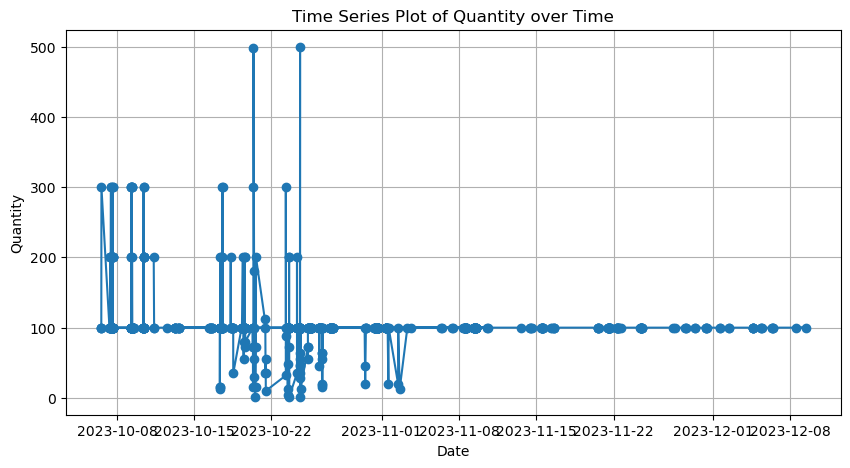

In [4]:
def build_and_evaluate_models(data):
    X = data[['Created']]
    y = data['Quantity']
    X['Created'] = X['Created'].map(pd.Timestamp.toordinal)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    models = [
        ('Linear Regression', LinearRegression()),
        ('Ridge', Ridge()),
        ('Lasso', Lasso()),
        ('Elastic Net', ElasticNet()),
        ('SVR', SVR()),
        ('Decision Tree', DecisionTreeRegressor()),
        ('Random Forest', RandomForestRegressor()),
        ('Gradient Boosting', GradientBoostingRegressor()),
        ('XGBoost', xgb.XGBRegressor(objective='reg:squarederror')),
        ('CatBoost', CatBoostRegressor(verbose=0))
    ]
    
    results = {}
    for name, model in models:
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        
        cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
        mse = mean_squared_error(y_test, predictions)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_test, predictions)
        r2 = r2_score(y_test, predictions)
        
        results[name] = {
            'CV Score Mean': np.mean(cv_scores),
            'Training Score': model.score(X_train, y_train),
            'Test Score': model.score(X_test, y_test),
            'MSE': mse,
            'RMSE': rmse,
            'MAE': mae,
            'R2': r2
        }
    
    results_df = pd.DataFrame(results).T
    results_df.index.name = 'Model'
    results_df.reset_index(inplace=True)
    
    return results_df

# Usage
filepath = 'data/SKU/0984310-F_1.csv'
data = load_and_prepare_data(filepath)
plot_timeseries(data)
results = build_and_evaluate_models(data)
# print(results)


In [5]:
results

,Model,CV Score Mean,Training Score,Test Score,MSE,RMSE,MAE,R2
0,Linear Regression,-2400.357091,0.036596,0.012749,1286.431003,35.866851,18.139707,0.012749
1,Ridge,-2400.342999,0.036596,0.012750,1286.430506,35.866844,18.139664,0.012750
2,Lasso,-2396.255091,0.036594,0.013090,1285.987193,35.860664,18.100239,0.013090
3,Elastic Net,-2394.303156,0.036595,0.013029,1286.066825,35.861774,18.107385,0.013029
4,SVR,-2123.854356,-0.017396,-0.009164,1314.984252,36.262712,10.273456,-0.009164
5,Decision Tree,-2194.045023,0.115600,0.015607,1282.707361,35.814904,16.926641,0.015607
6,Random Forest,-2201.010818,0.114598,0.022271,1274.023535,35.693466,16.892788,0.022271
7,Gradient Boosting,-2187.586152,0.115363,0.017681,1280.004511,35.777151,17.026780,0.017681
8,XGBoost,-2213.561455,0.115600,0.015609,1282.704957,35.814871,16.926655,0.015609
9,CatBoost,-2193.593682,0.115594,0.016200,1281.934645,35.804115,16.939031,0.016200


Model: The names of different regression models used.

CV Score Mean: This is the mean cross-validation score. It's negative because the scoring function used is negative mean squared error (MSE). A less negative value is better. It reflects generalization performance when the model is subjected to new data.

Training Score: This is the 
𝑅
2
R 
2
  score on the training dataset. It measures how well the model fits the training data. The closer this number is to 1, the better the model has "learned" from the training data.

Test Score: This is the 
𝑅
2
R 
2
  score on the test dataset. It measures how well the model predicts new, unseen data. Again, closer to 1 is better.

MSE (Mean Squared Error): Represents the average of the squares of the differences between observed and predicted values. Lower values are better as they indicate less error.

RMSE (Root Mean Squared Error): This is the square root of MSE and is in the same units as the target variable. It gives an idea of how large errors are spread out over the dataset. Lower values indicate a better fit.

MAE (Mean Absolute Error): The average of absolute differences between prediction and actual observation. Like RMSE, it measures the average magnitude of errors in a set of predictions, without considering their direction.

R2 (R-squared): Represents the proportion of variance in the dependent variable that is predictable from the independent variables in the model. Values can range from negative infinity to 1. Values close to 1 indicate a good model fit.

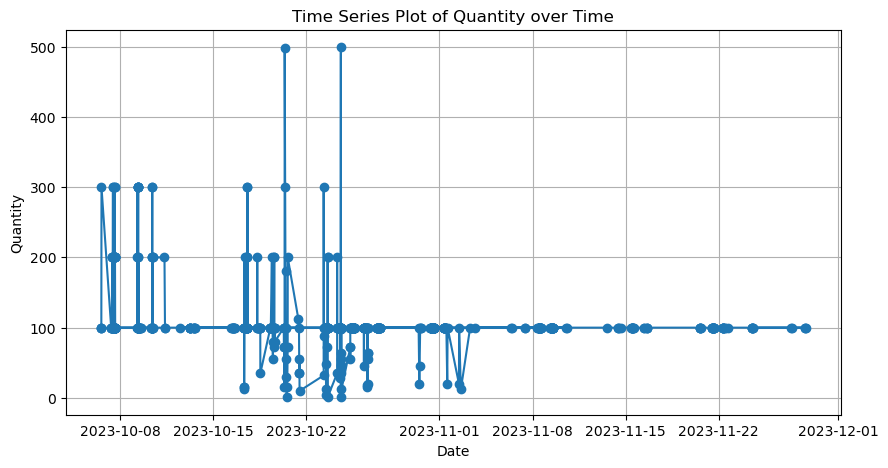

Best Parameters for Ridge: {'alpha': 10.0}
Best Parameters for Lasso: {'alpha': 10.0}
Best Parameters for Elastic Net: {'alpha': 10.0, 'l1_ratio': 0.8}


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost as xgb
from catboost import CatBoostRegressor

def load_and_prepare_data(filepath):
    df = pd.read_csv(filepath)
    df.drop(columns=['Sku'], inplace=True)
    df['Created'] = pd.to_datetime(df['Created'])
    
    # Feature Engineering
    df['DayOfWeek'] = df['Created'].dt.dayofweek  # Day of the week (0=Monday, 6=Sunday)
    df['Month'] = df['Created'].dt.month  # Month of the year (1-12)
    
    # Rolling window features (e.g., 7-day and 30-day rolling mean)
    df['7_day_avg'] = df['Quantity'].rolling(window=7).mean()
    df['30_day_avg'] = df['Quantity'].rolling(window=30).mean()

    # Drop rows with NaN values generated by rolling window
    df.dropna(subset=['7_day_avg', '30_day_avg'], inplace=True)
    
    return df

def plot_timeseries(data):
    plt.figure(figsize=(10, 5))
    plt.plot(data['Created'], data['Quantity'], marker='o', linestyle='-')
    plt.title('Time Series Plot of Quantity over Time')
    plt.xlabel('Date')
    plt.ylabel('Quantity')
    plt.grid(True)
    plt.show()

def build_and_evaluate_models(data):
    # Define features and target
    X = data[['DayOfWeek', 'Month', '7_day_avg', '30_day_avg']]  # Use temporal features
    y = data['Quantity']
    
    # Convert 'Created' to ordinal for models that may need numerical time representations
    X['Created'] = data['Created'].map(pd.Timestamp.toordinal)  # Add 'Created' as numerical feature if necessary

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Models list with hyperparameters
    models = [
        ('Linear Regression', LinearRegression(), {}),
        ('Ridge', Ridge(), {'alpha': [0.1, 1.0, 10.0]}),
        ('Lasso', Lasso(), {'alpha': [0.1, 1.0, 10.0]}),
        ('Elastic Net', ElasticNet(), {'alpha': [0.1, 1.0, 10.0], 'l1_ratio': [0.2, 0.5, 0.8]}),
        ('SVR', SVR(), {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}),
        ('Decision Tree', DecisionTreeRegressor(), {'max_depth': [None, 10, 20, 30]}),
        ('Random Forest', RandomForestRegressor(), {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20, 30]}),
        ('Gradient Boosting', GradientBoostingRegressor(), {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]}),
        ('XGBoost', xgb.XGBRegressor(objective='reg:squarederror'), {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]}),
        ('CatBoost', CatBoostRegressor(verbose=0), {'depth': [4, 6, 10], 'learning_rate': [0.01, 0.1, 0.2], 'iterations': [30, 50, 100]})
    ]
    
    results = {}
    
    # Iterate through each model
    for name, model, params in models:
        try:
            # Apply GridSearchCV for models with hyperparameters
            if params:
                grid_search = GridSearchCV(model, params, cv=5, scoring='neg_mean_squared_error')
                grid_search.fit(X_train, y_train)
                model = grid_search.best_estimator_  # Get the best model from grid search
                print(f"Best Parameters for {name}: {grid_search.best_params_}")
            
            # Fit the model
            model.fit(X_train, y_train)
            predictions = model.predict(X_test)
            
            # Cross-validation and metrics calculation
            cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
            mse = mean_squared_error(y_test, predictions)
            rmse = np.sqrt(mse)
            mae = mean_absolute_error(y_test, predictions)
            r2 = r2_score(y_test, predictions)
            
            results[name] = {
                'CV Score Mean': np.mean(cv_scores),
                'Training Score': model.score(X_train, y_train),
                'Test Score': model.score(X_test, y_test),
                'MSE': mse,
                'RMSE': rmse,
                'MAE': mae,
                'R2': r2
            }
        except Exception as e:
            print(f"Error training {name}: {e}")
    
    # Convert the results dictionary to a DataFrame
    results_df = pd.DataFrame(results).T
    results_df.index.name = 'Model'
    results_df.reset_index(inplace=True)
    
    return results_df

# Example usage
filepath = 'data/SKU/0984310-F_1.csv'  # Replace with your file path
data = load_and_prepare_data(filepath)
plot_timeseries(data)
results = build_and_evaluate_models(data)
print(results)